In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import seaborn as sns
import os
import joblib
from tensorflow.keras.models import load_model
from IPython.display import display
from scipy.stats import binned_statistic
from pathlib import Path

/home/sourabie/Thesis/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-06 13:55:18.076763: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762433718.086841 1292108 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762433718.089900 1292108 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-06 13:55:18.101502: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical 

In [2]:
SAVE_DIR = Path("../output/data_preparation_outputs")
# loading scaler and feature names
if SAVE_DIR.exists():
    scaler = joblib.load(SAVE_DIR / 'scaler.joblib')
    test_specimen_name = np.load(SAVE_DIR / 'name.npy')
    ra = np.load(SAVE_DIR / 'ra.npy')
else:
    raise Exception("File could not be found")

SAVE_DIR = Path("../output/training_outputs")

# Loading test data and model
if SAVE_DIR.exists():
    X_test = np.load(SAVE_DIR / 'X_test.npy')
    X_train = np.load(SAVE_DIR / 'X_train.npy')
    y_test = np.load(SAVE_DIR / 'y_test.npy')
    idx_train = np.load(SAVE_DIR / 'idx_train.npy')
    idx_test = np.load(SAVE_DIR / 'idx_test.npy')
    surface_roughness_ra_train = np.load(SAVE_DIR / 'surface_roughness_ra_train.npy')
    surface_roughness_ra_test = np.load(SAVE_DIR / 'surface_roughness_ra_test.npy')
    names_train = np.load(SAVE_DIR / 'names_train.npy')
    names_test = np.load(SAVE_DIR / 'names_test.npy')
    trained_model = load_model(SAVE_DIR / 'nn_model.h5')
else:
    raise Exception(SAVE_DIR / "File could not be found")


# Loading feature names
FILE_PATH = '../data/Kochmesser_ohne_prozessdaten.xlsx'
dataset = pd.read_excel(FILE_PATH)
features = dataset.loc[:, 'Ra_ganz':'DFT_Median_sobel_Bereich'].columns
# X_test_df = pd.DataFrame(X_test[:20], columns=features)
X_test_df = pd.DataFrame(X_test, columns=features)

# Predict class for each rows in our dataset
probs = trained_model.predict(X_test)
y_pred = probs.argmax(axis=1)

W0000 00:00:1762433719.188680 1292108 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step


In [3]:
if "Spalte1" in dataset.columns:
    dataset = dataset.copy()
    dataset["orig_index"] = dataset["Spalte1"].astype(int)
    dataset = dataset.set_index("orig_index", drop=False)
else:
    dataset = dataset.copy()
    dataset["orig_index"] = dataset.index

batch_edges = np.array([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1700, 1900,
                        2100, 2300, 2500, 2700, 2900, 3100, 3300, 3500, 3700, 3900,
                        4100, 4300, 4500, 4700, 4900, 5100, 5300, 5500, 5700, 5900,
                        6100, 6300, 6510, 6710, 6910, 7110, 7310, 7510, 7710, 7910,
                        8110, 8310, 8510])


dataset["Batch_ID"] = np.searchsorted(batch_edges, dataset["orig_index"], side="right") - 1
dataset["Batch_ID"] = dataset["Batch_ID"].clip(lower=0, upper=len(batch_edges)-2)

### Compute batch-level statistics

In [4]:
# batch_stats = dataset.groupby("Batch_ID")[list(features) + [target]].agg(["mean", "std", "var"])
# batch_stats.to_excel(SAVE_DIR / "batch_statistics.xlsx")
# print(f"Saved batch_statistics.xlsx → {SAVE_DIR/'batch_statistics.xlsx'}")

# Build single explanations (e.x. 193 and 197)

✅ Saved → /home/sourabie/Thesis/notebooks/batch_analysis_outputs/test_batch_deviation_analysis_with_indices.xlsx


/tmp/ipykernel_1292108/282687750.py:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=z_df, x="is_misclassified", y="mean_abs_z", palette="pastel")


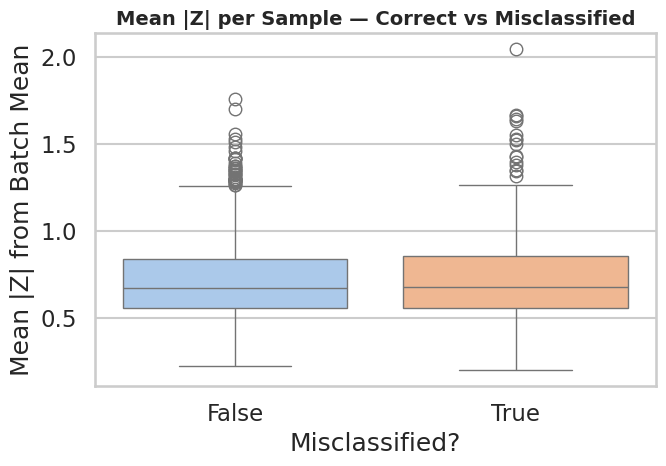

/tmp/ipykernel_1292108/282687750.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_diff.values[:15], y=feat_diff.index[:15], palette="rocket")


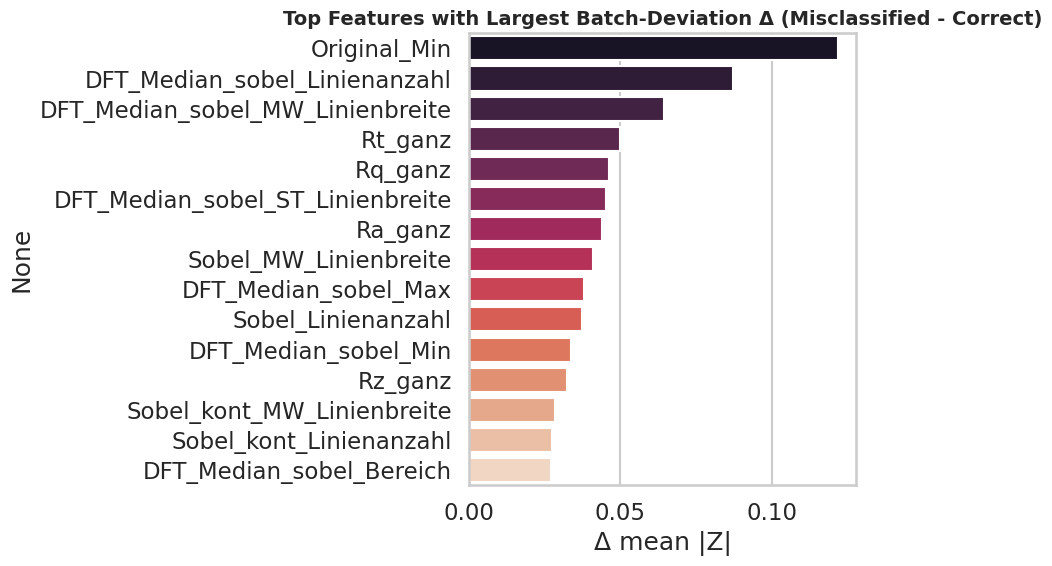

Analysis complete.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

sns.set_theme(style="whitegrid", context="talk")

DATASET_XLSX = "Kochmesser_ohne_prozessdaten.xlsx"   
OUT_DIR = Path("batch_analysis_outputs")
OUT_DIR.mkdir(parents=True, exist_ok=True)


dataset = pd.read_excel(f"../data/{DATASET_XLSX}")


try:
    features  
except NameError:
    features = dataset.loc[:, 'Ra_ganz':'DFT_Median_sobel_Bereich'].columns

dataset = dataset.copy()
dataset.index = dataset.index.astype(int)


batch_edges = np.array([
    0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1700, 1900,
    2100, 2300, 2500, 2700, 2900, 3100, 3300, 3500, 3700, 3900,
    4100, 4300, 4500, 4700, 4900, 5100, 5300, 5500, 5700, 5900,
    6100, 6300, 6510, 6710, 6910, 7110, 7310, 7510, 7710, 7910,
    8110, 8310, 8510
])


dataset["Batch_ID"] = np.searchsorted(batch_edges, dataset.index.values, side="right") - 1
dataset["Batch_ID"] = dataset["Batch_ID"].clip(lower=0, upper=len(batch_edges)-2)



assert 'X_test' in globals() and 'y_test' in globals() and 'idx_test' in globals(), \
    "You must have X_test, y_test, idx_test in memory from your train_test_split."
assert 'trained_model' in globals(), "Keras model 'trained_model' must be loaded."
assert len(X_test) == len(y_test) == len(idx_test), "Length mismatch in test arrays."


idx_test = np.asarray(idx_test, dtype=int) 
test_pos = np.arange(len(idx_test), dtype=int)  

meta_test = pd.DataFrame({
    "test_pos": test_pos,
    "orig_index": idx_test,
    "true_class": y_test.astype(int)
})

meta_test["Batch_ID"] = dataset["Batch_ID"].reindex(meta_test["orig_index"]).values


try:
    X_test_unscaled = scaler.inverse_transform(X_test)
except Exception:
  
    X_test_unscaled = X_test

X_test_df = pd.DataFrame(X_test_unscaled, columns=features)
X_test_df.insert(0, "test_pos", test_pos)
X_test_df.insert(1, "orig_index", idx_test)
X_test_df.set_index("orig_index", inplace=True)


batch_stats = dataset.groupby("Batch_ID")[list(features)].agg(["mean","std","var"])
batch_stats.to_excel(OUT_DIR / "batch_statistics.xlsx")


def zscores_for_test(X_test_df: pd.DataFrame,
                     meta_test: pd.DataFrame,
                     batch_stats: pd.DataFrame,
                     features: pd.Index) -> pd.DataFrame:
    rows = []
    for _, r in meta_test.iterrows():
        bi = int(r["Batch_ID"])
        mu = batch_stats.loc[bi, (features, "mean")].values
        sd = batch_stats.loc[bi, (features,  "std")].values
        x  = X_test_df.loc[int(r["orig_index"]), features].values
        z  = (x - mu) / np.where(sd == 0, 1, sd)
        rows.append(z)
    Z = pd.DataFrame(np.vstack(rows), columns=features, index=meta_test["orig_index"])
    Z.insert(0, "test_pos", meta_test["test_pos"].values)
    Z.insert(1, "Batch_ID",  meta_test["Batch_ID"].values)
    return Z

z_df = zscores_for_test(X_test_df, meta_test, batch_stats, features)
z_df["mean_abs_z"] = np.abs(z_df[features]).mean(axis=1)
z_df["max_abs_z"]  = np.abs(z_df[features]).max(axis=1)


probs = trained_model.predict(X_test, verbose=0)
y_pred = probs.argmax(axis=1)


z_df = z_df.reset_index(names="orig_index")

# Merge predicted class via test_pos
z_df = z_df.merge(
    pd.DataFrame({"test_pos": test_pos, "predicted_class": y_pred}),
    on="test_pos", how="left"
)


z_df = z_df.merge(
    meta_test[["test_pos","orig_index","true_class"]],
    on=["test_pos","orig_index"], how="left"
)

z_df["is_misclassified"] = (z_df["predicted_class"] != z_df["true_class"])


out_xlsx = OUT_DIR / "test_batch_deviation_analysis_with_indices.xlsx"
z_df.to_excel(out_xlsx, index=False)
print(f" Saved as {out_xlsx.resolve()}")


def compare_two_by_orig(orig_a: int, orig_b: int, topn: int = 10):
    if orig_a not in z_df["orig_index"].values:
        print(f" Original index {orig_a} not in TEST set.")
        return None
    if orig_b not in z_df["orig_index"].values:
        print(f" Original index {orig_b} not in TEST set.")
        return None

    cols_meta = ["test_pos","Batch_ID","true_class","predicted_class","is_misclassified","mean_abs_z","max_abs_z"]
    A = z_df.loc[z_df["orig_index"] == orig_a, cols_meta].iloc[0]
    B = z_df.loc[z_df["orig_index"] == orig_b, cols_meta].iloc[0]
    print("=== A (orig) ===\n", A, "\n")
    print("=== B (orig) ===\n", B, "\n")

    # Feature-wise z-scores side-by-side
    Za = z_df.loc[z_df["orig_index"] == orig_a, features].iloc[0].astype(float)
    Zb = z_df.loc[z_df["orig_index"] == orig_b, features].iloc[0].astype(float)
    comp = pd.DataFrame({"z_A": Za, "z_B": Zb, "abs_diff": (Za - Zb).abs()}) \
            .sort_values("abs_diff", ascending=False).head(topn)
    return comp


# deviation vs correctness
plt.figure(figsize=(7,5))
sns.boxplot(data=z_df, x="is_misclassified", y="mean_abs_z", palette="pastel")
plt.title("Mean |Z| per Sample — Correct vs Misclassified", fontsize=14, weight="bold")
plt.xlabel("Misclassified?")
plt.ylabel("Mean |Z| from Batch Mean")
plt.tight_layout()
plt.savefig(OUT_DIR / "zscore_boxplot_correct_vs_misclassified.png", dpi=300)
plt.show()

# Top features by Δ mean |Z|
feat_diff = (z_df[z_df.is_misclassified][features].abs().mean() -
             z_df[~z_df.is_misclassified][features].abs().mean()).sort_values(ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(x=feat_diff.values[:15], y=feat_diff.index[:15], palette="rocket")
plt.title("Top Features with Largest Batch-Deviation Δ (Misclassified - Correct)", fontsize=14, weight="bold")
plt.xlabel("Δ mean |Z|")
plt.tight_layout()
plt.savefig(OUT_DIR / "feature_deviation_difference_top15.png", dpi=300)
plt.show()

print("Analysis complete.")


### Compute training-set statistics

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


try:
    features
except NameError:
    features = dataset.loc[:, 'Ra_ganz':'DFT_Median_sobel_Bereich'].columns


try:
    X_train_unscaled = scaler.inverse_transform(X_train)
except Exception:
    X_train_unscaled = X_train

train_stats = pd.DataFrame(X_train_unscaled, columns=features)
train_means = train_stats.mean(axis=0)
train_stds  = train_stats.std(axis=0).replace(0, 1)  


### Compute “train-reference z-scores” for the test set

In [ ]:
X_test_trainref_z = (X_test_df[features] - train_means.values) / train_stds.values


trainref_z = X_test_trainref_z.copy()
trainref_z["orig_index"] = X_test_df.index
trainref_z["test_pos"]   = X_test_df["test_pos"].values
trainref_z["Batch_ID"]   = meta_test["Batch_ID"].values
trainref_z["true_class"] = meta_test["true_class"].values


trainref_z["predicted_class"] = z_df.set_index("orig_index").loc[X_test_df.index, "predicted_class"].values
trainref_z["is_misclassified"] = trainref_z["predicted_class"] != trainref_z["true_class"]


trainref_z["mean_abs_trainZ"] = np.abs(trainref_z[features]).mean(axis=1)
trainref_z["max_abs_trainZ"]  = np.abs(trainref_z[features]).max(axis=1)


### Compare misclassified vs correct (relative to training distribution)

/tmp/ipykernel_1292108/1022762061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=trainref_z, x="is_misclassified", y="mean_abs_trainZ", palette="pastel")


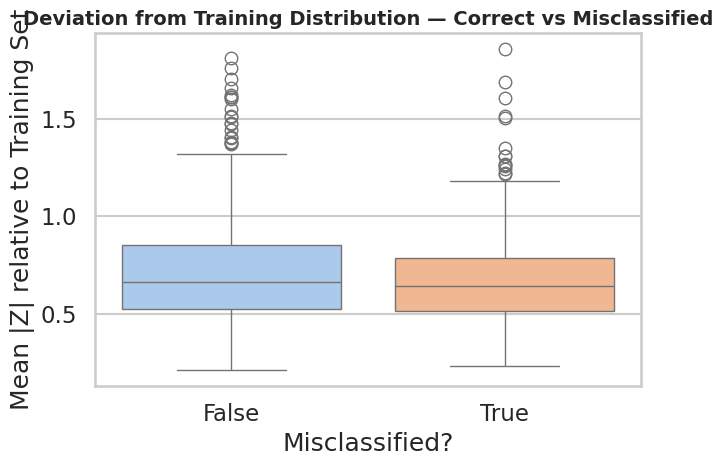

[Train reference] misclassified have higher |Z|? U=274100.0, p=0.978


In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=trainref_z, x="is_misclassified", y="mean_abs_trainZ", palette="pastel")
plt.title("Deviation from Training Distribution — Correct vs Misclassified", fontsize=14, weight="bold")
plt.xlabel("Misclassified?")
plt.ylabel("Mean |Z| relative to Training Set")
plt.tight_layout()
plt.savefig("train_reference_zscore_boxplot.png", dpi=300)
plt.show()

from scipy import stats
mis = trainref_z["is_misclassified"]
tstat, p = stats.mannwhitneyu(trainref_z.loc[mis,"mean_abs_trainZ"],
                              trainref_z.loc[~mis,"mean_abs_trainZ"],
                              alternative="greater")
print(f"[Train reference] misclassified have higher |Z|? U={tstat:.1f}, p={p:.3g}")


In [ ]:
def compare_two_trainZ(orig_a: int, orig_b: int, topn: int = 10):
    for o in (orig_a, orig_b):
        if o not in trainref_z["orig_index"].values:
            print(f" Original index {o} not in test set.")
            return None
    A = trainref_z.loc[trainref_z["orig_index"] == orig_a].iloc[0]
    B = trainref_z.loc[trainref_z["orig_index"] == orig_b].iloc[0]
    print("=== A (orig) ===\n", A[["Batch_ID","true_class","predicted_class","is_misclassified","mean_abs_trainZ","max_abs_trainZ"]], "\n")
    print("=== B (orig) ===\n", B[["Batch_ID","true_class","predicted_class","is_misclassified","mean_abs_trainZ","max_abs_trainZ"]], "\n")

    Za = trainref_z.loc[trainref_z["orig_index"] == orig_a, features].iloc[0].astype(float)
    Zb = trainref_z.loc[trainref_z["orig_index"] == orig_b, features].iloc[0].astype(float)
    comp = pd.DataFrame({
        "trainZ_A": Za,
        "trainZ_B": Zb,
        "abs_diff": (Za - Zb).abs()
    }).sort_values("abs_diff", ascending=False).head(topn)
    return comp

# Example:



### Compare specific samples (193 vs 197)

In [14]:
comp_trainZ_193_197 = compare_two_trainZ(193, 197, topn=12)
display(comp_trainZ_193_197)

=== A (orig) ===
 Batch_ID                   0
true_class                 1
predicted_class            1
is_misclassified       False
mean_abs_trainZ     0.691934
max_abs_trainZ      3.254391
Name: 193, dtype: object 

=== B (orig) ===
 Batch_ID                   0
true_class                 1
predicted_class            0
is_misclassified        True
mean_abs_trainZ     0.554703
max_abs_trainZ      2.196446
Name: 197, dtype: object 



,trainZ_A,trainZ_B,abs_diff
Original_Max,3.254391,-0.263529,3.517920
Original_Bereich,3.254089,-0.263193,3.517282
DFT_Median_Max,-0.505589,2.196446,2.702035
DFT_Median_Bereich,-0.514848,2.164389,2.679238
Original_ST_Linienbreite,2.266915,0.082228,2.184687
DFT_Median_ST_Linienbreite,-0.293079,1.310792,1.603871
DFT_Median_sobel_Min,-1.409188,-0.012785,1.396403
DFT_Median_MW_Linienbreite,-0.230903,0.738242,0.969145
DFT_Median_sobel_Linienanzahl,0.714156,-0.250107,0.964263
DFT_Median_sobel_Bereich,0.450626,-0.366218,0.816844
